# Examen Parcial 1

## Instrucciones

Vamos a generar un analisis utilizando un conjunto de datos de factores de riesgo para la enfermedad cardíaca cardiovascular.

Solo debemos escribir el codigo que se nos pida en las celdas que digan `## tu codigo aqui`

In [1]:
# Solo ejectuar esta celda
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import pandas as pd
import numpy as np
import json

from matplotlib import pyplot as plt 
import seaborn as sns

## Cargando la data
### 1. Cargamos el set de datos
Cargamos la data que se encuentra en el achivo CSV `heart_data.csv`, para esto utilizamos pandas.

Este conjunto de datos contiene información detallada sobre los factores de riesgo de enfermedad cardiovascular. Incluye información sobre edad, sexo, altura, peso, valores de presión arterial, niveles de colesterol, niveles de glucosa, hábitos de tabaquismo y consumo de alcohol de más de 70 mil personas. Además, indica si la persona es activa o no y si tiene alguna enfermedad cardiovascular. Este conjunto de datos proporciona un gran recurso para que los investigadores apliquen técnicas modernas de aprendizaje automático para explorar las posibles relaciones entre los factores de riesgo y las enfermedades cardiovasculares que, en última instancia, pueden conducir a una mejor comprensión de este grave problema de salud y diseñar mejores medidas preventivas.

In [4]:
## tu codigo aqui
data = pd.read_csv('heart_data.csv')

In [5]:
# drop index column
data = data.drop(columns=['index'])

Imprimimos un sample de la data

In [6]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### 2. Cargamos el diccionario de datos
El diccionario de datos se encuentra en el archivo JSON `diccionario_datos.json`

In [8]:
f = open("diccionario_datos.json")
data_dict = json.load(f)

Utilizar un ciclo for para imprimir los valores de el diccionario de datos.

**Ayuda:** utilizar iterar sobre `data_dict.items()` [ejemplo](https://www.w3schools.com/python/python_dictionaries_loop.asp)

In [9]:
## Tu codigo aqui
for key,val in data_dict.items():
    print(f'{key} : {val}')

Age : Age of participant, its in days (integer)
Gender : Gender of participant (male/female).
Height : Height measured in centimeters (integer)
Weight : Weight measured in kilograms (integer)
Ap_hi : Systolic blood pressure reading taken from patient (integer)
Ap_lo : Diastolic blood pressure reading taken from patient (integer)
Cholesterol : Total cholesterol level read as mg/dl on a scale 0 - 5+ units( integer). Each unit denoting increase/decrease by 20 mg/dL respectively.
Gluc : Glucose level read as mmol/l on a scale 0 - 16+ units( integer). Each unit denoting increase Decreaseby 1 mmol/L respectively.
Smoke : Whether person smokes or not(binary; 0= No , 1=Yes).
Alco : Whether person drinks alcohol or not(binary; 0 =No ,1 =Yes ).
Active : whether person physically active or not( Binary ;0 =No,1 = Yes ).
Cardio : whether person suffers from cardiovascular diseases or not(Binary ; 0-no , 1-yes ).


### Analisis de datos

Como podemos ver en el diccionario de datos la variable `age` esta en dias. Vamos a tranformar esta variable en años y generar ciertos analisis.
En la siguiente celda se guarda un arreglo de Numpy con las edades.


In [10]:
## Esta celda solo hay que ejecutarla
data["age"] = data["age"].to_numpy() / 365

Calculemos la media de la variable edad

**Ayuda:** numpy.mean()

In [11]:
## Tu codigo aqui:
## Respuesta 54.0779
data["age"].mean()

53.33935839530333

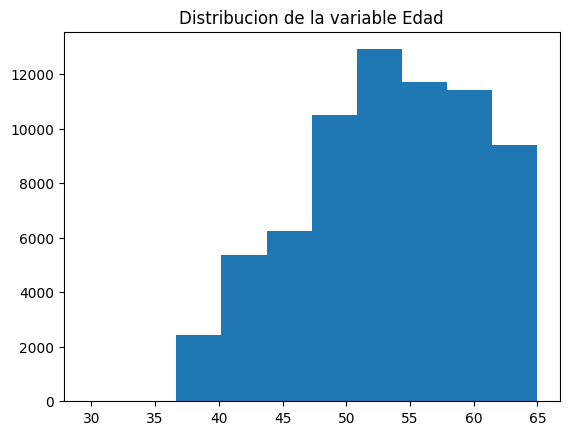

In [12]:
## Esta celda solo hay que ejecutarla
plt.hist(data["age"]) 
plt.title("Distribucion de la variable Edad") 
plt.show()

Vamos a cargar los datos de las siguientes variables en arreglos de numpy.
- Alco
- Active
- Cardio

Como ya tenemos el diccionario de datos podemos consultar ahi que significa cada una.
Consultemos el diccionario para entender mejor que son, debemos imprimir la explicación de la variable, las varibles que estan listadas en esta celta son las llaves del diccionario:

In [13]:
## tu codigo aqui:
print(f"Alco : {data_dict['Alco']}")
print(f"Active : {data_dict['Active']}")
print(f"Cardio : {data_dict['Cardio']}")

Alco : Whether person drinks alcohol or not(binary; 0 =No ,1 =Yes ).
Active : whether person physically active or not( Binary ;0 =No,1 = Yes ).
Cardio : whether person suffers from cardiovascular diseases or not(Binary ; 0-no , 1-yes ).


In [14]:
## Esta celda solo hay que ejecutarla, cargamos los valores en arreglos de numpy
data["alco"] = data["alco"].to_numpy()
data["active"] = data["active"].to_numpy()
data["cardio"] = data["cardio"].to_numpy()

Vamos a utilizar las varibles `alco`, `active`, `cardio` para responder las siguientes preguntas:
- ¿Cuantas personas en este conjunto de datos beben alcohol?
- ¿Cuantas personas tienen actividad fisica?
- ¿Cuantas personas sufren enfermedades cardiovasculares?

**Ayuda**: podemos utilizar un ciclo for

In [15]:
## tu codigo aqui
count_alco_people = (data['alco'] == 1).sum()
count_active_people = (data['active'] == 1).sum()
count_cardio_people = (data['cardio'] == 1).sum()

#### Respuestas:
Escribe en markdown las respuestas de las preguntas

In [16]:
print(count_alco_people,count_active_people,count_cardio_people)

3764 56261 34979


### ¿Cuantas personas en este conjunto de datos beben alcohol?
- Hay 3,764 personas que beben alcohol
### ¿Cuantas personas tienen actividad fisica?
- Hay 56,261 personas que hacen alguna actividad fisica
### ¿Cuantas personas sufren enfermedades cardiovasculares?
- Hay 34,979 personans que sufren de alguna enfermedads cardiovasculares

En la siguiente celda hay un codigo que va a graficar los conteos con esto vamos a poder validar los resultados.

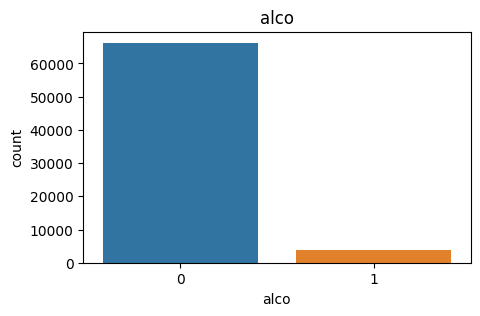

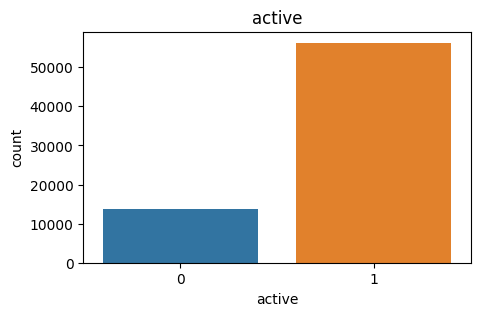

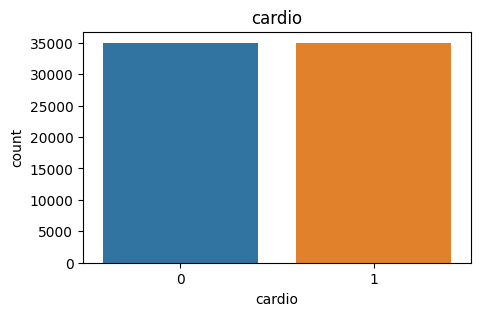

In [17]:
## Para ayudarte a validar tus resuldos ejecuta este codigo
features = ['alco', 'active', 'cardio']
for col in features:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col,data=data)
    plt.title(col)
    plt.show()

## Analisis de datos
A continuación vamos a graficar los conteos de las variables, pero ahora vamos a ver los conteos agrupando los datos por una enfermedad cardiovascular.
Esta parte es solo de ejecutar el codigo y escribir una conclusión en Markdown

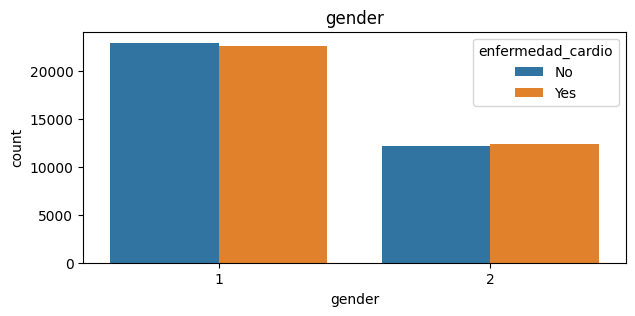

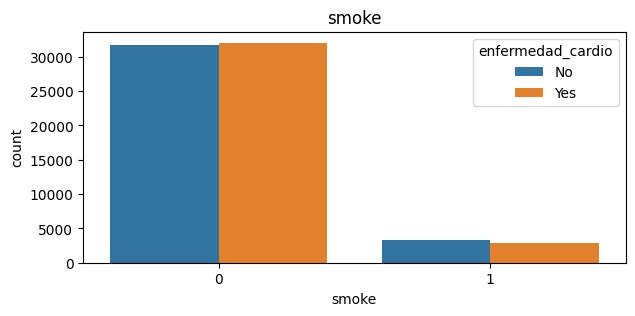

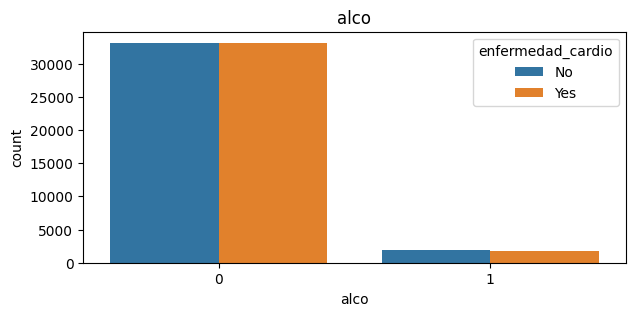

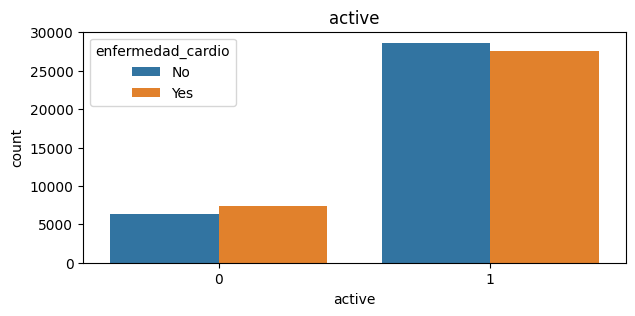

In [18]:
## Para ayudarte a validar tus resuldos ejecuta este codigo
data['enfermedad_cardio'] = data['cardio'].map({0:'No',1:'Yes'})
features = ['gender','smoke','alco', 'active']
for col in features:
    plt.figure(figsize=(7,3))
    sns.countplot(x=col,hue='enfermedad_cardio',data=data)
    plt.title(col)
    plt.show()